## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [59]:
#
# Your code to import matplotlib, pandas and numpy libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Following code loads the CIFAR 10 datset.

In [60]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [61]:
#
# Your code to print shapes of training and test data. Check how the data looks
#
print("X_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [62]:
# Your code to print the shape of one image.
print(x_train[0].shape)

(32, 32, 3)


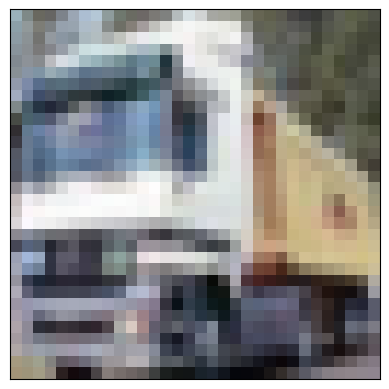

In [63]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

plt.imshow(x_train[1])
plt.xticks([])
plt.yticks([])
plt.show()

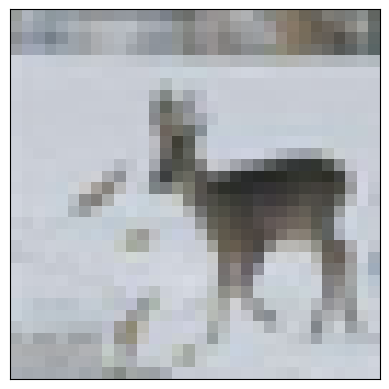

In [64]:
# Show any other image
plt.imshow(x_train[20])
plt.xticks([])
plt.yticks([])
plt.show()

# PreProcessing

In [65]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[1])

[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ...
  [ 42  34  36]
  [ 61  53  57]
  [ 93  83  91]]

 [[165 154 128]
  [156 152 130]
  [159 161 142]
  ...
  [103  93  96]
  [123 114 120]
  [131 121 131]]

 [[163 148 120]
  [158 148 122]
  [163 156 133]
  ...
  [143 133 139]
  [143 134 142]
  [143 133 144]]]


In [66]:
# Your code to print shape of any image i.e particular value in the x_train
print(x_train[np.random.randint(50000)].shape)

(32, 32, 3)


In [67]:
# Your code to print the maximum value in x_train. Hint - Use .max()
print(np.max(x_train))

255


In [68]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
# Print the shape of x_train again.


(50000, 32, 32, 3)

In [69]:
# Print the shape of y_train again.
print(x_train.shape)

(50000, 32, 32, 3)


# One hot vector encoding.
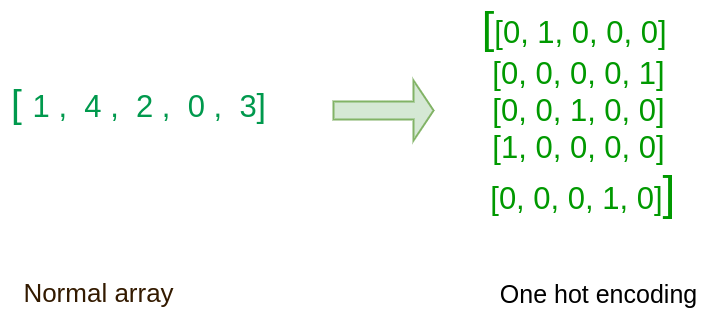


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [70]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train[0].shape)
# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train)
print(y_cat_train)

(1,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [71]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)

(50000, 10)


In [74]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[0])
print(y_train[0])
# Compare the result for better understanding of "to_categorical()"


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[6]


In [75]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)
# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)

(10000, 10)


In [78]:
y_test[0]

array([3], dtype=uint8)

In [77]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

----------
# Building the Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [153]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))


model.add(Flatten())

#
# Add few dense layers. 
#

model.add(Dense(64, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

In [154]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 11, 11, 64)        51264     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 64)               

In [125]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.

### Following code shows how you can use early stopping.


In [155]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [156]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy', metrics='accuracy')

In [157]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch

history = model.fit(x_train, y_cat_train, 
                    validation_data=(x_test, y_cat_test),
                    
                    callbacks=[early_stop], epochs=100)

Epoch 1/100
1563/1563 [==============================] - 24s 14ms/step - loss: 1.5752 - accuracy: 0.4188 - val_loss: 1.3100 - val_accuracy: 0.5253
Epoch 2/100
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2297 - accuracy: 0.5589 - val_loss: 1.1619 - val_accuracy: 0.5833
Epoch 3/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1035 - accuracy: 0.6092 - val_loss: 1.0821 - val_accuracy: 0.6169
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0242 - accuracy: 0.6381 - val_loss: 1.0496 - val_accuracy: 0.6308
Epoch 5/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9623 - accuracy: 0.6606 - val_loss: 1.0193 - val_accuracy: 0.6444
Epoch 6/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9136 - accuracy: 0.6776 - val_loss: 0.9825 - val_accuracy: 0.6601
Epoch 7/100
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8739 - accuracy: 0.6925 - val_loss: 0

### We can save the model in a file. Following code shows how to do this.

In [158]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [161]:
losses = pd.DataFrame(model.history.history)

In [162]:
# Print first few rows of losses.
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.575225,0.41878,1.309959,0.5253
1,1.229708,0.55886,1.161932,0.5833
2,1.103473,0.60922,1.082109,0.6169
3,1.024188,0.63814,1.049620,0.6308
4,0.962303,0.66064,1.019323,0.6444


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





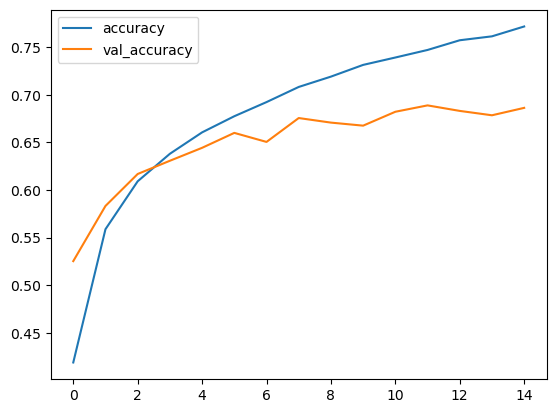

In [163]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

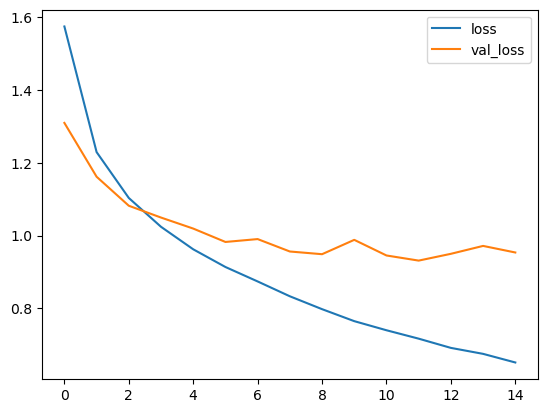

In [164]:
# 
# Your code to plot loss and val_loss vs the epochs
#
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [165]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [166]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9535357356071472, 0.6863999962806702]

### Make a prediction on test data set.   

In [167]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 2s 6ms/step


### We could get the full classification report. 

In [168]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [169]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.74      0.67      0.70      1000\n           1       0.80      0.81      0.81      1000\n           2       0.68      0.49      0.57      1000\n           3       0.46      0.54      0.49      1000\n           4       0.66      0.65      0.66      1000\n           5       0.52      0.67      0.59      1000\n           6       0.73      0.82      0.77      1000\n           7       0.80      0.65      0.72      1000\n           8       0.79      0.76      0.78      1000\n           9       0.79      0.81      0.80      1000\n\n    accuracy                           0.69     10000\n   macro avg       0.70      0.69      0.69     10000\nweighted avg       0.70      0.69      0.69     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [170]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [171]:
confusion_matrix(y_test,predictions)

array([[667,  39,  52,  41,  20,  19,  11,  11,  97,  43],
       [ 20, 809,   3,  16,   7,  14,  16,   6,  23,  86],
       [ 51,  13, 489, 104,  90, 108,  90,  30,  16,   9],
       [ 17,  13,  40, 538,  44, 233,  73,  23,   8,  11],
       [ 17,   3,  44,  99, 649,  60,  57,  50,  18,   3],
       [  7,   6,  31, 181,  41, 669,  25,  28,   4,   8],
       [  6,   5,  16,  71,  31,  35, 823,   5,   3,   5],
       [ 14,   6,  22,  70,  84, 130,  14, 647,   6,   7],
       [ 82,  32,   8,  37,   9,  10,   8,   2, 762,  50],
       [ 23,  80,   9,  25,   6,   7,  10,   6,  23, 811]], dtype=int64)

<Axes: >

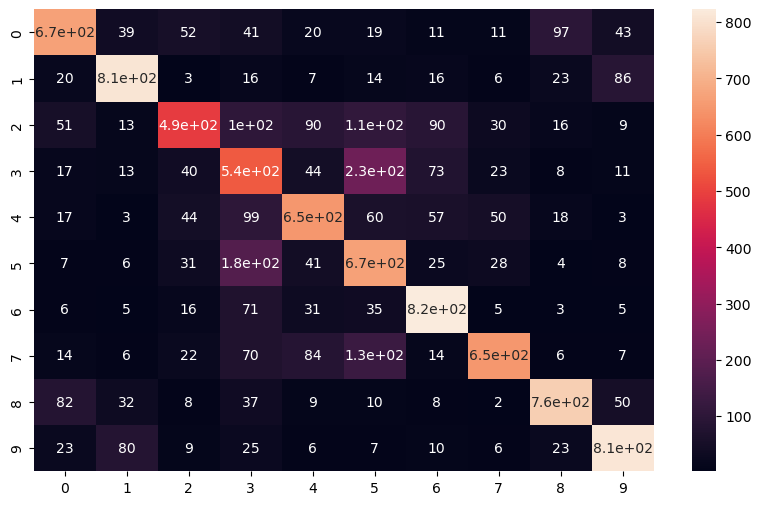

In [172]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [173]:
my_image = x_test[16]

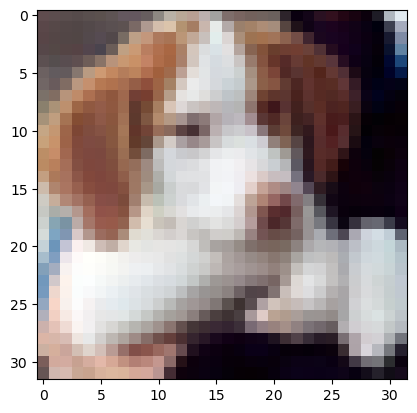

In [174]:
plt.imshow(my_image)

In [175]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 25ms/step


array([[8.0965983e-05, 1.5041837e-04, 3.3406643e-04, 8.5460439e-02,
        2.5789134e-06, 9.1198385e-01, 5.6706231e-05, 1.4606052e-03,
        2.6501417e-05, 4.4380612e-04]], dtype=float32)

In [178]:
# Find the highest probability value in the vector above. 
# What output value does it point to?
np.argmax(model.predict(my_image.reshape(1,32,32,3)))

1/1 [==============================] - 0s 27ms/step


5

In [177]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 27ms/step


array([5], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 28ms/step


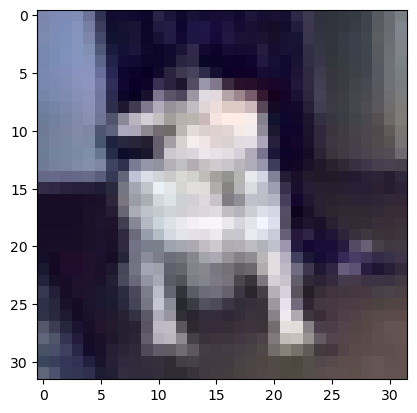

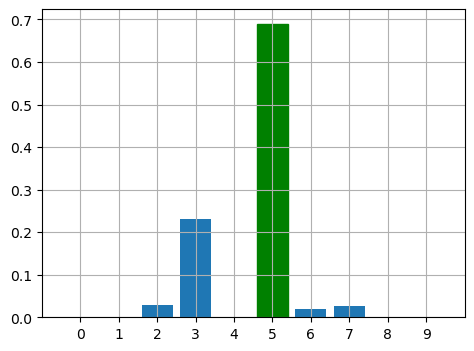

The predicted answer: dog 
 Correct answer: dog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [184]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = np.random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 